In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
'''
假設x_data和y_data各有10筆,
x_data和y_data的關係是 y_data = b + w * x_data
b和w都是參數，我們要用gradient descent的方式把b,w找出來
'''
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

In [26]:
x = np.arange(-200, -100, 1)   #bias
y = np.arange(-5, 5, 0.1)      #weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x,y)
for i in range(len(x)):
  for j in range(len(y)):
    b = x[i]
    w = y[j]
    Z[j][i] = 0
    for n in range(len(x_data)):
      # [y^ - (b+w*xdata)]的次方
      # 累加在Z

      Z[j][i] = Z[j][i] + (y_data[n] - (b + w*x_data[n]))**2
    Z[j][i] = Z[j][i]/len(x_data)

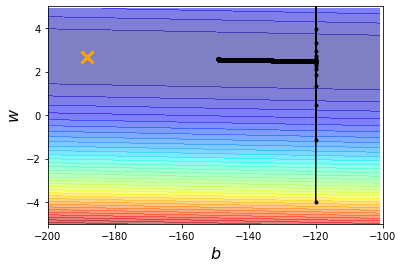

In [36]:
#initalization
b = -120
w = -4
lr = 0.000001
iteration = 100000

#store initial values for plotting
b_history = [b]
w_history = [w]


##Goal: 在每一個iteration中，我們要計算出b和w對Loss的偏微分
#Iterations


for i in range(iteration):
  b_grad = 0.0
  w_grad = 0.0
  for n in range(len(x_data)):
    #可以參照上課的時候的偏微分的式子
    b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
    w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
  
  #update parameters
  b = b - lr*b_grad
  w = w - lr*w_grad

  #store parameters for plotting
  b_history.append(b)
  w_history.append(w)

#plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

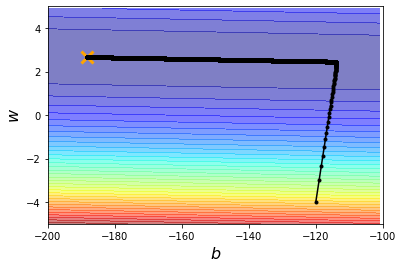

In [37]:
#為了解決一直沒辦法走到最佳解的情況，除了可以調整lr以外，可以讓w和b各自有各自的learning rate
#AdaGrad
#initalization
b = -120
w = -4
lr = 1
iteration = 100000

#store initial values for plotting
b_history = [b]
w_history = [w]

# b和w各有自己的lr
lr_b = 0
lr_w = 0

##Goal: 在每一個iteration中，我們要計算出b和w對Loss的偏微分
for i in range(iteration):
  b_grad = 0.0
  w_grad = 0.0
  for n in range(len(x_data)):
    #可以參照上課的時候的偏微分的式子
    b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
    w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
  lr_b = lr_b + b_grad ** 2
  lr_w = lr_w + w_grad ** 2
  #update parameters
  b = b - lr/np.sqrt(lr_b)*b_grad
  w = w - lr/np.sqrt(lr_w)*w_grad

  #store parameters for plotting
  b_history.append(b)
  w_history.append(w)

#plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()